# Inspect AP coordinates

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_loc = pd.read_csv("/local/traceset1/APlocations.txt", sep=",")
df = pd.read_csv("/local/traceset1/2014_06.csv", header='infer')

In [ ]:
print(df_loc)
df.head()

              AP  x_coordinate(m)  y_coordinate(m)  floor
0       Bldg1AP1            21534            32313    2.0
1       Bldg1AP2            21534            32313    2.0
2       Bldg1AP3            21534            32313    3.0
3       Bldg1AP4            21534            32313    3.0
4       Bldg1AP5            21534            32313    4.0
...          ...              ...              ...    ...
1118  Bldg48AP68            14356            39196    NaN
1119  Bldg48AP69            14356            39196    NaN
1120  Bldg48AP70            14356            39196    NaN
1121  Bldg48AP71            14356            39196    NaN
1122  Bldg48AP72            14356            39196    NaN

[1123 rows x 4 columns]


,timestamp,client,AP
0,2014-06-01 00:00:00,d1fbe2c4a9956bb221621fc35f438b8ec59864ab,Bldg37AP12
1,2014-06-01 00:00:02,cc8f315d1985d98bedccfd665202b2b29abf949b,Bldg4AP19
2,2014-06-01 00:00:03,6c06e1dccd734c581bc3274ccdc6525529b61896,Bldg3AP16
3,2014-06-01 00:00:04,6c06e1dccd734c581bc3274ccdc6525529b61896,Bldg3AP96
4,2014-06-01 00:00:05,c5a9e70c2e12b0e0268cdba77aef17873575bb3b,Bldg3AP108


In [ ]:
x_coord = df_loc['x_coordinate(m)']
y_coord = df_loc['y_coordinate(m)']
print(y_coord)

0       32313
1       32313
2       32313
3       32313
4       32313
        ...  
1118    39196
1119    39196
1120    39196
1121    39196
1122    39196
Name: y_coordinate(m), Length: 1123, dtype: int64


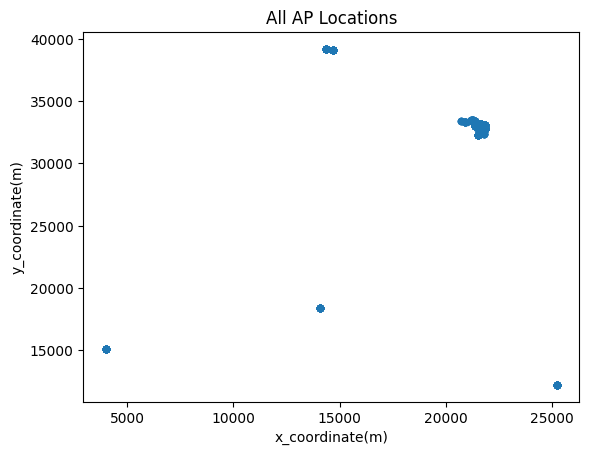

In [ ]:
all_loc = df_loc.plot(kind='scatter', x='x_coordinate(m)', y='y_coordinate(m)', title='All AP Locations')

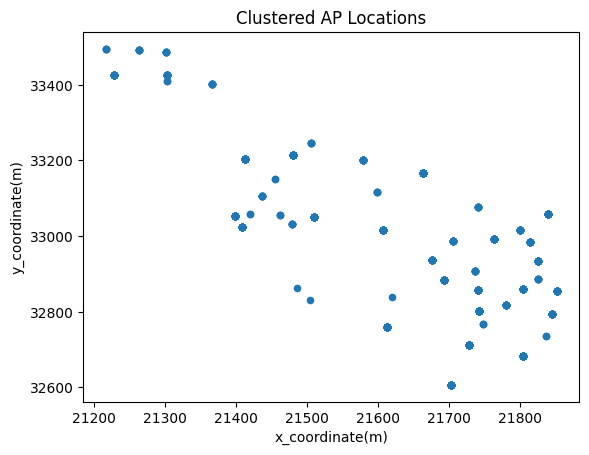

In [ ]:
filter = (df_loc['x_coordinate(m)']>21000) & (df_loc['x_coordinate(m)']<22500) & (df_loc['y_coordinate(m)']>32400) & (df_loc['y_coordinate(m)']< 34000)
filtered_loc = df_loc.loc[filter]
filtered_plt = filtered_loc.plot(kind='scatter', x='x_coordinate(m)', y='y_coordinate(m)', title='Clustered AP Locations')

<div>
<img src="kth_campus.png" width="500"/>
</div>

# Find One Person's Trace

In [ ]:
# find the person with the most traffic
ppl_occr = df.client.value_counts()
prsn_client = ppl_occr.nlargest(n = 1)
print(prsn_client)

e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a    24593
Name: client, dtype: int64


In [ ]:
id = "e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a"
trace = df.query('client == @id')
aps_visited = trace.AP.unique()
print(aps_visited)

['Bldg3AP51' 'Bldg3AP48' 'Bldg3AP50' 'Bldg3AP115' 'Bldg3AP49' 'Bldg3AP54'
 'Bldg3AP53' 'Bldg14AP10' 'Bldg3AP113' 'Bldg6AP38' 'Bldg3AP64' 'Bldg3AP63'
 'Bldg3AP47' 'Bldg3AP61' 'Bldg3AP78' 'Bldg3AP71' 'Bldg3AP120' 'Bldg3AP81'
 'Bldg3AP11' 'Bldg3AP94' 'Bldg3AP32' 'Bldg3AP96' 'Bldg3AP102' 'Bldg3AP114'
 'Bldg3AP110' 'Bldg3AP44' 'Bldg3AP35' 'Bldg3AP91' 'Bldg3AP95' 'Bldg3AP99'
 'Bldg3AP55']


In [ ]:
df_merged = pd.merge(trace, df_loc, on='AP', how="left")

In [ ]:
df_merged.head()

,timestamp,client,AP,x_coordinate(m),y_coordinate(m),floor
0,2014-06-11 11:55:51,e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a,Bldg3AP51,21779,32818,6.0
1,2014-06-11 11:56:35,e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a,Bldg3AP51,21779,32818,6.0
2,2014-06-11 11:57:21,e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a,Bldg3AP51,21779,32818,6.0
3,2014-06-11 11:57:33,e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a,Bldg3AP51,21779,32818,6.0
4,2014-06-11 11:57:46,e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a,Bldg3AP51,21779,32818,6.0


In [ ]:
print(df_merged)

                 timestamp                                    client  \
0      2014-06-11 11:55:51  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a   
1      2014-06-11 11:56:35  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a   
2      2014-06-11 11:57:21  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a   
3      2014-06-11 11:57:33  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a   
4      2014-06-11 11:57:46  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a   
...                    ...                                       ...   
24588  2014-06-18 11:08:52  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a   
24589  2014-06-18 11:09:43  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a   
24590  2014-06-18 11:10:03  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a   
24591  2014-06-18 11:10:20  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a   
24592  2014-06-18 11:10:32  e47ecfe3a02a430f3cdb2ab5276697c4f4c2042a   

              AP  x_coordinate(m)  y_coordinate(m)  floor  
0      Bldg3AP51            21779            32818    6.0  
1      Bldg3AP5

<AxesSubplot:title={'center':"One Client's Trace"}, xlabel='x_coordinate(m)', ylabel='y_coordinate(m)'>

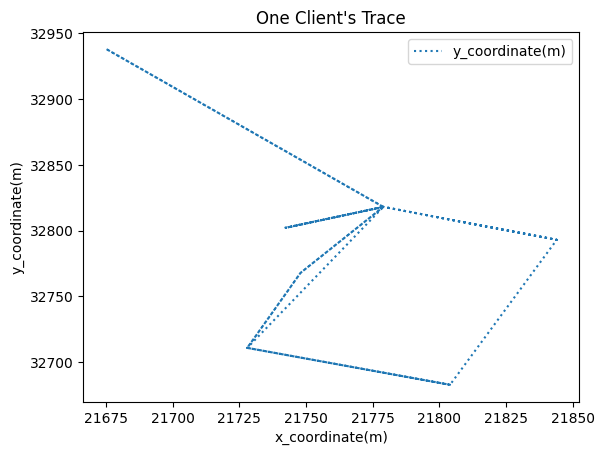

In [32]:
df_merged.plot(x='x_coordinate(m)', y='y_coordinate(m)', title='One Client\'s Trace', linestyle='dotted', ylabel='y_coordinate(m)')

# Number of Visits Per Client

In [ ]:
# Get the number of associations per client
asso_per_client = df.client.value_counts()
df_asso = pd.DataFrame(list(asso_per_client))
print(df_asso)

           0
0      24593
1       9386
2       8256
3       6341
4       3989
...      ...
23479      1
23480      1
23481      1
23482      1
23483      1

[23484 rows x 1 columns]


<AxesSubplot:title={'center':'Histogram of Number of Associations'}, ylabel='Frequency'>

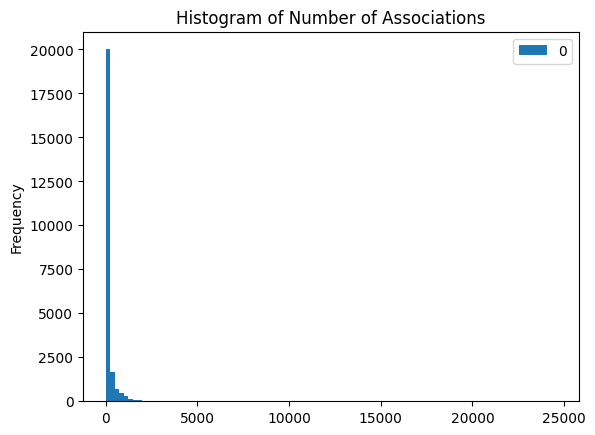

In [ ]:
df_asso.plot.hist(bins = 100, title = 'Histogram of Number of Associations')

<AxesSubplot:title={'center':'Boxplot of Number of Associations'}>

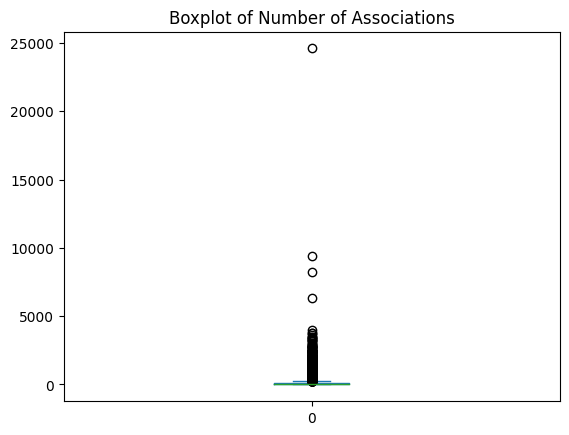

In [ ]:
df_asso.plot.box(title = 'Boxplot of Number of Associations')

## Remove Outliers
ref: https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles

In [ ]:
Q1 = df_asso.quantile(0.25)
Q3 = df_asso.quantile(0.75)
print(Q1, Q3)
IQR = Q3 - Q1
# Removing outliers using percentiles
df_asso_removed = df_asso[~((df_asso < (Q1 - 1.5 * IQR)) | (df_asso > (Q3 + 1.5 * IQR))).any(axis=1)]

0    8.0
Name: 0.25, dtype: float64 0    119.0
Name: 0.75, dtype: float64


## Inspect Distribution of Association Frequency

<AxesSubplot:title={'center':'Histogram of Number of Associations (without outliers)'}, ylabel='Frequency'>

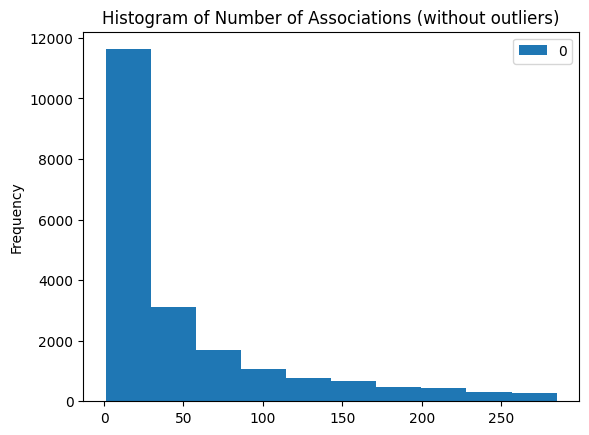

In [ ]:
df_asso_removed.plot.hist(title = "Histogram of Number of Associations (without outliers)")

<AxesSubplot:title={'center':'PDF of Association Frequency'}, ylabel='Density'>

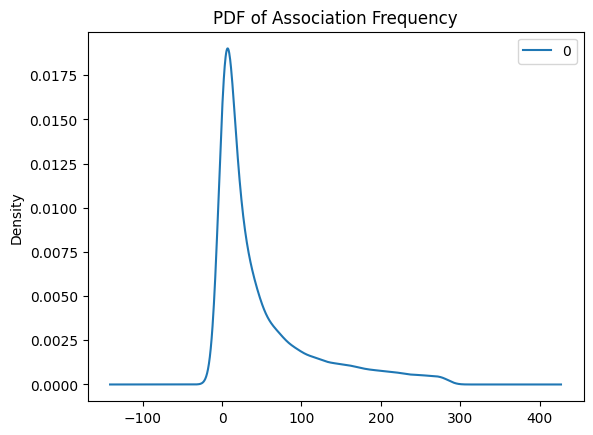

In [ ]:
df_asso_removed.plot(kind='kde',title = 'PDF of Association Frequency')